<a href="https://colab.research.google.com/github/eric-shaker/BIOENG_1340_AUTO_TUMOR_SEGMENTATION/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 161 kB/s 


In [ ]:
# Import the packages
import numpy as np
import SimpleITK as sitk
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Extract the values corresponding to the tumor region of the brain and store that in one array and store the values of the rest of the brain in another array for each image
def val_extraction(img_path, seg_path):
  all_imgs = sorted(os.listdir(img_path))
  all_segs = sorted(os.listdir(seg_path))
  all_imgs = [os.path.join(img_path, x) for x in all_imgs]
  all_segs = [os.path.join(seg_path, x) for x in all_segs]
  paths = pd.DataFrame({'img_path': all_imgs, 'seg_path': all_segs})

  tumor_vals = list()
  rest_vals = list()
  for index, row in tqdm(paths.iterrows()):
    img = sitk.ReadImage(row['img_path'])
    seg = sitk.ReadImage(row['seg_path'])
    npimg = sitk.GetArrayFromImage(img)
    npseg = sitk.GetArrayFromImage(seg)
    npimg = np.ravel(npimg)
    npseg = np.ravel(npseg)
    tumor_idx = np.where(npseg == 1)[0]
    rest_idx = np.where(npseg == 0)[0]
    tumor_vals.append(npimg[tumor_idx])
    rest_vals.append(npimg[rest_idx])

  tumor_vals = np.concatenate(tumor_vals)
  rest_vals = np.concatenate(rest_vals)
  return tumor_vals, rest_vals

In [ ]:
# Function to exclude outliers
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# Training Images

In [ ]:
# Obtain the tumor and surrounding area brain intensity values for all the training images
train_img_path = "/content/gdrive/MyDrive/BIOENG_1340/BIOENG 1340 - Final Project/images/train_images64"
train_seg_path = "/content/gdrive/MyDrive/BIOENG_1340/BIOENG 1340 - Final Project/segs/train_segs_WT64"

tumor_vals, rest_vals = val_extraction(train_img_path, train_seg_path)
print(tumor_vals.shape)
print(rest_vals.shape)

100it [00:49,  2.01it/s]

(272100,)
(25942300,)


Tumor: 153.37823486328125 +/- 35.58698654174805
Rest: 40.17884063720703 +/- 30.544763565063477


Text(0.5, 1.0, 'Training Images')

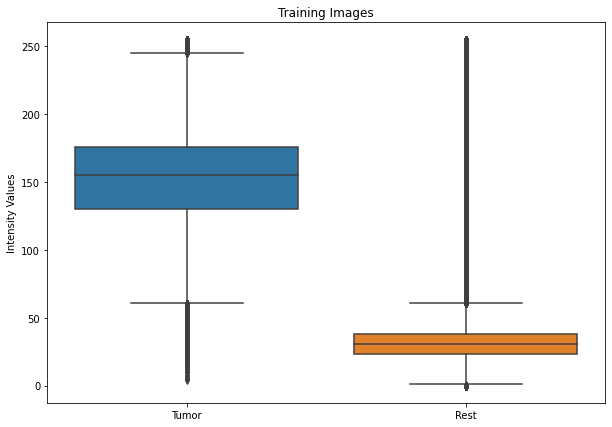

In [ ]:
# Boxplots of the tumor and remaining area (with outliers)
fig, ax = plt.subplots(figsize = (10,7))
print(f"Tumor: {np.mean(tumor_vals)} +/- {np.std(tumor_vals)}")
print(f"Rest: {np.mean(rest_vals)} +/- {np.std(rest_vals)}")
sns.boxplot(data=[tumor_vals, rest_vals])
ax.set(xticks=[0,1], xticklabels=['Tumor','Rest'])
plt.ylabel('Intensity Values')
plt.title('Training Images')

In [ ]:
# Obtain distributions without outliers
new_tumor_vals = reject_outliers(tumor_vals)
new_rest_vals = reject_outliers(reject_outliers(reject_outliers(rest_vals)))
print(new_tumor_vals.shape)
print(new_rest_vals.shape)

(259444,)
(21247406,)


Tumor: 153.6794891357422 +/- 31.51582145690918
Rest: 28.889442443847656 +/- 7.738950252532959


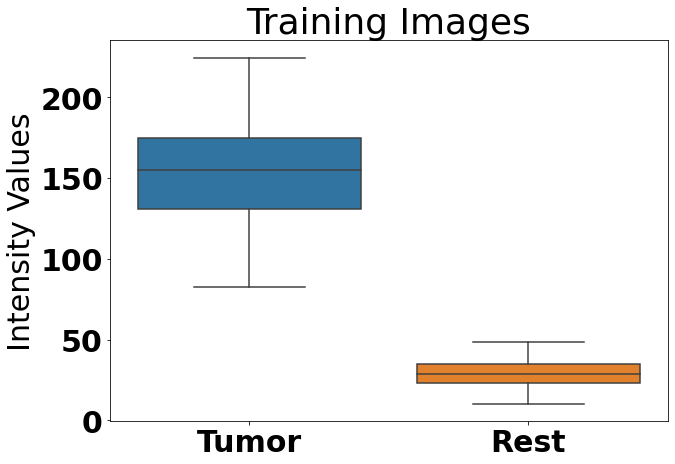

In [ ]:
# Boxplots of the tumor and remaining area (no outliers)
fig, ax = plt.subplots(figsize = (10,7))
print(f"Tumor: {np.mean(new_tumor_vals)} +/- {np.std(new_tumor_vals)}")
print(f"Rest: {np.mean(new_rest_vals)} +/- {np.std(new_rest_vals)}")
sns.boxplot(data=[new_tumor_vals, new_rest_vals])
ax.set(xticks=[0,1], xticklabels=['Tumor','Rest'])
plt.ylabel('Intensity Values')
plt.title('Training Images')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)

In [ ]:
# Student's t-test
print(f"T-Test with original data: {stats.ttest_ind(tumor_vals, rest_vals, equal_var=False)}")
print(f"T-Test Results: {stats.ttest_ind(new_tumor_vals, new_rest_vals, equal_var=False)}")
_, p = stats.ttest_ind(new_tumor_vals, new_rest_vals, equal_var=False)
print(f"p-value = {p}")

T-Test with original data: Ttest_indResult(statistic=639.2094196213806, pvalue=0.0)
T-Test Results: Ttest_indResult(statistic=777.9332925995683, pvalue=0.0)
p-value = 0.0


In [ ]:
# Mann-Whitney U Test
_, p_orig = stats.mannwhitneyu(tumor_vals, rest_vals)
print(p_orig)

0.0


# Testing Images

In [ ]:
# Obtain the tumor and surrounding area brain intensity values for all the testing images
train_img_path = "/content/gdrive/MyDrive/BIOENG_1340/BIOENG 1340 - Final Project/images/test_images64"
train_seg_path = "/content/gdrive/MyDrive/BIOENG_1340/BIOENG 1340 - Final Project/segs/test_segs_WT64"

tumor_vals, rest_vals = val_extraction(train_img_path, train_seg_path)
print(tumor_vals.shape)
print(rest_vals.shape)

50it [00:37,  1.32it/s]

(147788,)
(12959412,)


Tumor: 156.24468994140625 +/- 40.321292877197266
Rest: 39.80182647705078 +/- 28.97805404663086


Text(0.5, 1.0, 'Testing Images')

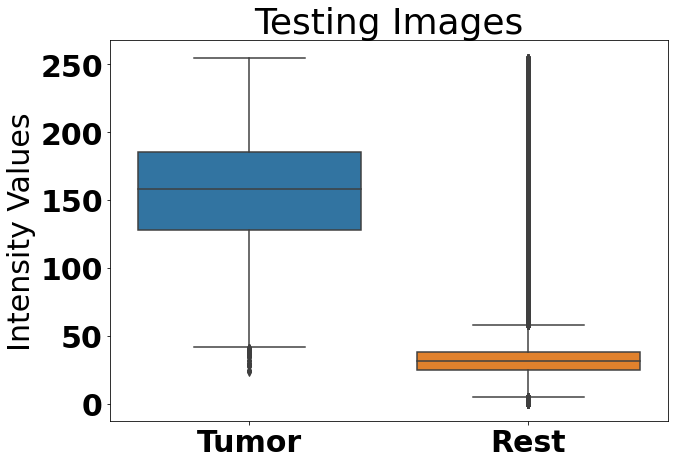

In [ ]:
# Boxplots of the tumor and remaining area (with outliers)
fig, ax = plt.subplots(figsize = (10,7))
print(f"Tumor: {np.mean(tumor_vals)} +/- {np.std(tumor_vals)}")
print(f"Rest: {np.mean(rest_vals)} +/- {np.std(rest_vals)}")
sns.boxplot(data=[tumor_vals, rest_vals])
ax.set(xticks=[0,1], xticklabels=['Tumor','Rest'])
plt.ylabel('Intensity Values')
plt.title('Testing Images')

In [ ]:
# Obtain distributions without outliers
new_tumor_vals = reject_outliers(tumor_vals)
new_rest_vals = reject_outliers(reject_outliers(reject_outliers(rest_vals)))
print(new_tumor_vals.shape)
print(new_rest_vals.shape)

(142085,)
(11052303,)


Tumor: 156.91493225097656 +/- 37.13691711425781
Rest: 29.177553176879883 +/- 7.657085418701172


Text(0.5, 1.0, 'Testing Images')

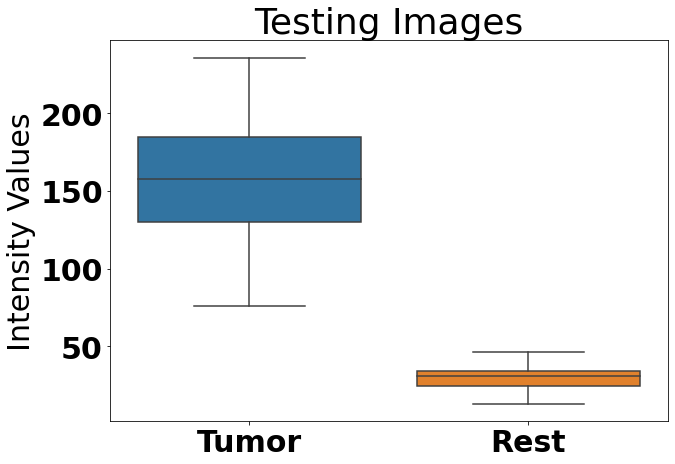

In [ ]:
# Boxplots of the tumor and remaining area (no outliers)
fig, ax = plt.subplots(figsize = (10,7))
print(f"Tumor: {np.mean(new_tumor_vals)} +/- {np.std(new_tumor_vals)}")
print(f"Rest: {np.mean(new_rest_vals)} +/- {np.std(new_rest_vals)}")
sns.boxplot(data=[new_tumor_vals, new_rest_vals])
ax.set(xticks=[0,1], xticklabels=['Tumor','Rest'])
plt.ylabel('Intensity Values')
plt.title('Testing Images')

In [ ]:
# Student's t-test
print(f"T-Test with original data: {stats.ttest_ind(tumor_vals, rest_vals, equal_var=False)}")
print(f"T-Test Results: {stats.ttest_ind(new_tumor_vals, new_rest_vals, equal_var=False)}")

T-Test with original data: Ttest_indResult(statistic=428.92053377382825, pvalue=0.0)
T-Test Results: Ttest_indResult(statistic=515.7093727737592, pvalue=0.0)


In [ ]:
# Mann-Whitney U Test
_, p_orig = stats.mannwhitneyu(tumor_vals, rest_vals)
print(p_orig)

0.0
